In [38]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [39]:
# Read the data
mnist_train = sp.genfromtxt('mnist_train.txt', delimiter=',')
mnist_test = sp.genfromtxt('mnist_test.txt', delimiter=',')
print(mnist_train.shape, mnist_test.shape)

/var/folders/bz/2zqbp1nd7vbbv1psb4wm19qh0000gn/T/ipykernel_16811/1624776810.py:2: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  mnist_train = sp.genfromtxt('mnist_train.txt', delimiter=',')
/var/folders/bz/2zqbp1nd7vbbv1psb4wm19qh0000gn/T/ipykernel_16811/1624776810.py:3: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  mnist_test = sp.genfromtxt('mnist_test.txt', delimiter=',')


(2000, 785) (1000, 785)


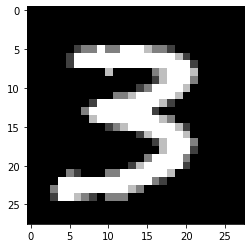

Label: 3


In [40]:
# Plot one image to check it worked
img = mnist_train[0, 1:].astype(sp.uint8).reshape(28, 28)
plt.gray()
plt.imshow(img)
plt.show()
print('Label:', mnist_train[0, 0].astype(sp.uint8))

In [41]:
# Function to normalize the features of a data set
def normalize(dataset : np.ndarray) -> np.ndarray:
    normalized_dataset = dataset.copy()
    # normalize the features (but not the labels)
    for i in range(normalized_dataset.shape[0]):
        for j in range(normalized_dataset.shape[1]-1):
            temp = normalized_dataset[i][j+1]
            normalized_dataset[i][j+1] = 2*temp/255-1
    return normalized_dataset

# Apply the function on each data set
normalized_mnist_train = normalize(mnist_train)
normalized_mnist_test = normalize(mnist_test)
print("First training data point normalization:\n", mnist_train[0])
print("\nFirst training data point after normalization:\n", normalized_mnist_train[0])



First training data point normalization:
 [  3.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  64. 128. 128. 255. 128. 128. 255.
 255. 255. 191. 128. 128.  64.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  64. 255. 255. 255. 255. 255. 255. 255.
 255. 255. 255. 255. 255. 255. 191.

In [42]:
# Create a classifier: a support vector classifier
clf = svm.SVC()
# Learn the digits on the train subset
X_train, y_train = normalized_mnist_train[:, 1:], normalized_mnist_train[:, 0]
clf.fit(X_train,y_train)
# Predict the value of the digit on the test subset
X_test, y_test = normalized_mnist_test[:, 1:], normalized_mnist_test[:, 0]
predicted_test = clf.predict(X_test)

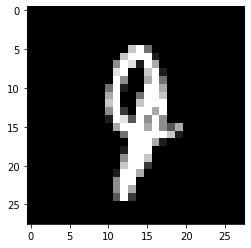

Label: 9
Predicted: 4


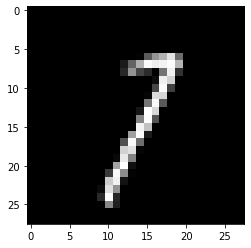

Label: 7
Predicted: 1


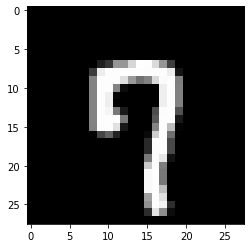

Label: 7
Predicted: 9


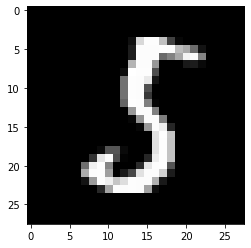

Label: 5
Predicted: 3


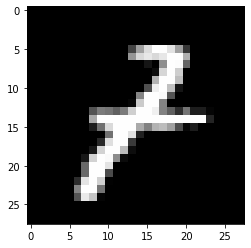

Label: 7
Predicted: 1


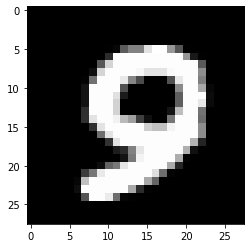

Label: 9
Predicted: 8


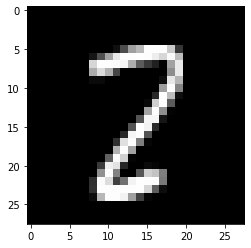

Label: 2
Predicted: 8


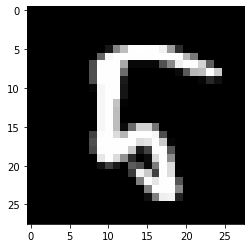

Label: 5
Predicted: 8


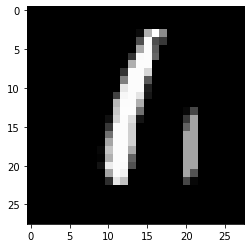

Label: 1
Predicted: 6


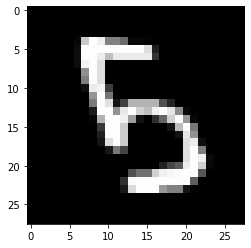

Label: 5
Predicted: 3


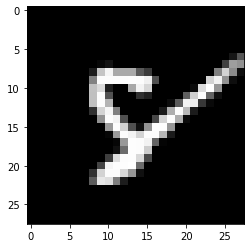

Label: 8
Predicted: 4


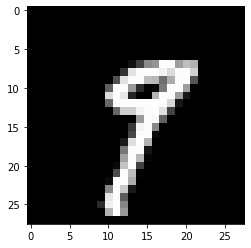

Label: 9
Predicted: 7


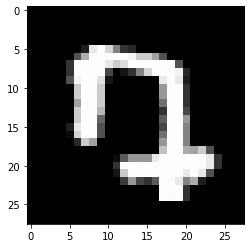

Label: 7
Predicted: 0


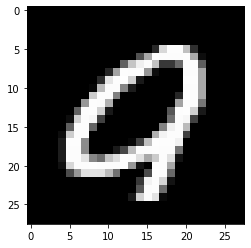

Label: 9
Predicted: 0


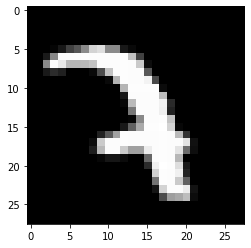

Label: 7
Predicted: 1


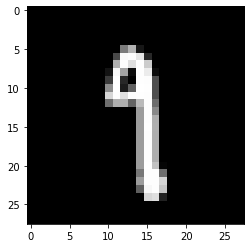

Label: 9
Predicted: 1


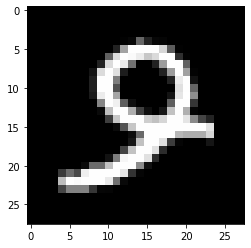

Label: 9
Predicted: 8


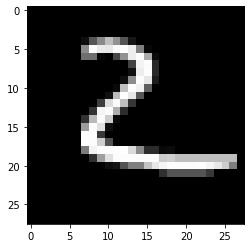

Label: 2
Predicted: 6


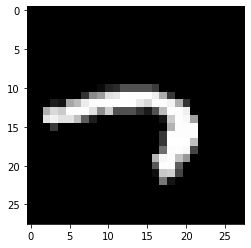

Label: 7
Predicted: 5


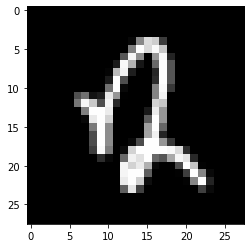

Label: 2
Predicted: 4


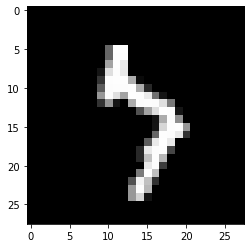

Label: 7
Predicted: 5


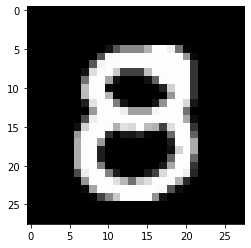

Label: 8
Predicted: 3


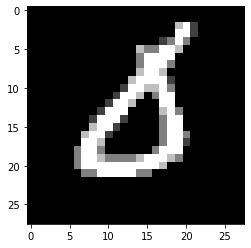

Label: 0
Predicted: 6


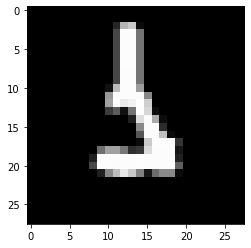

Label: 1
Predicted: 6


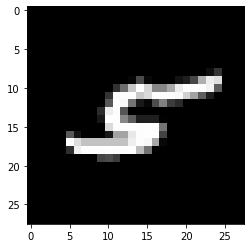

Label: 5
Predicted: 4


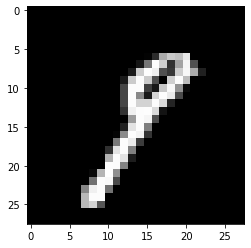

Label: 9
Predicted: 1


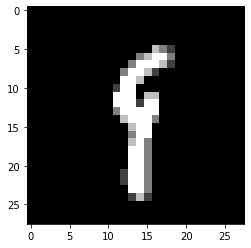

Label: 9
Predicted: 1


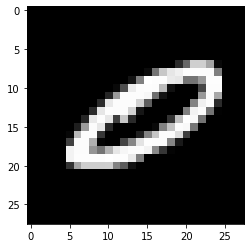

Label: 0
Predicted: 5


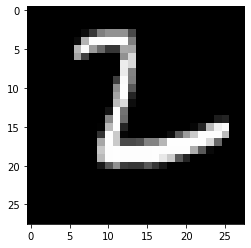

Label: 2
Predicted: 6


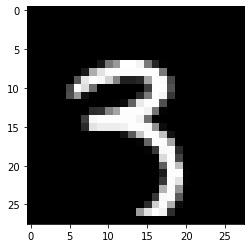

Label: 3
Predicted: 9


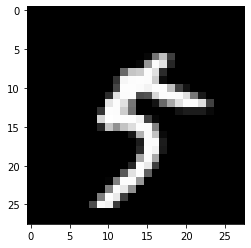

Label: 5
Predicted: 9


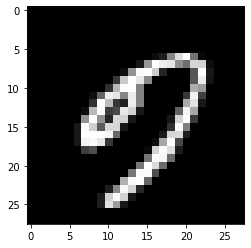

Label: 9
Predicted: 0


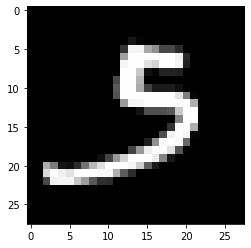

Label: 5
Predicted: 3


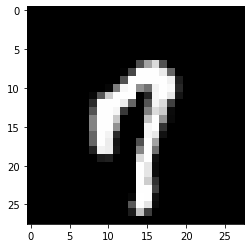

Label: 7
Predicted: 9


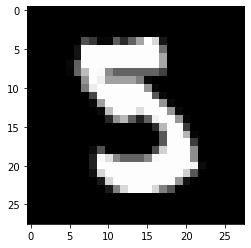

Label: 5
Predicted: 3


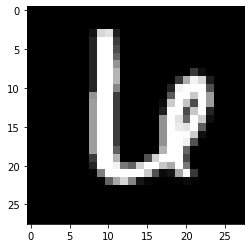

Label: 6
Predicted: 0


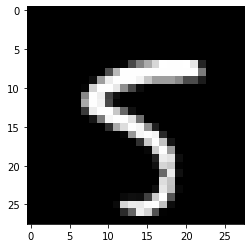

Label: 5
Predicted: 9


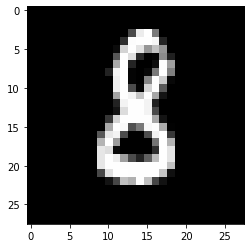

Label: 8
Predicted: 6


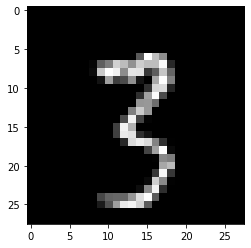

Label: 3
Predicted: 7


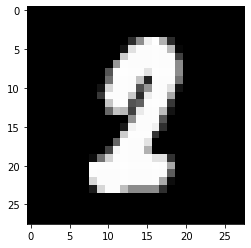

Label: 2
Predicted: 8


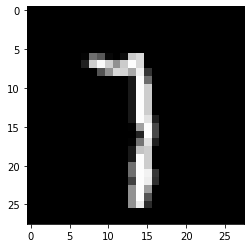

Label: 7
Predicted: 1


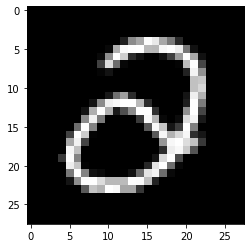

Label: 2
Predicted: 5


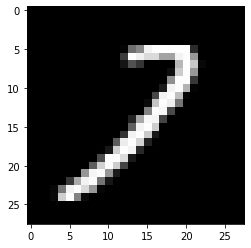

Label: 7
Predicted: 1


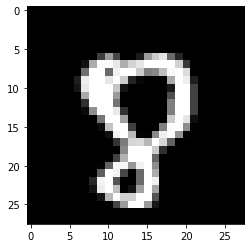

Label: 8
Predicted: 7


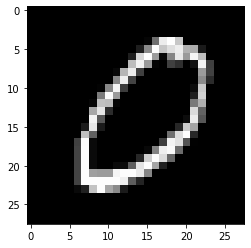

Label: 0
Predicted: 5


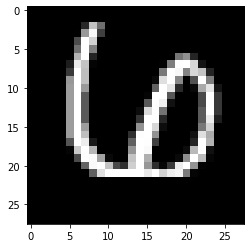

Label: 6
Predicted: 2


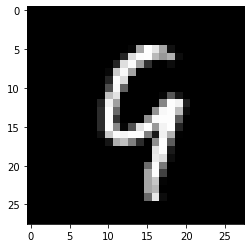

Label: 9
Predicted: 4


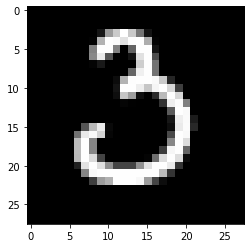

Label: 3
Predicted: 0


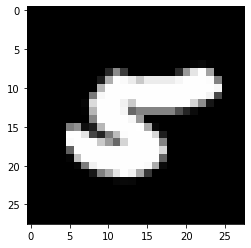

Label: 5
Predicted: 8


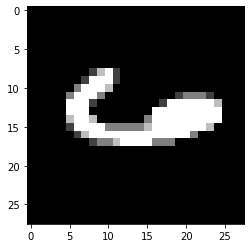

Label: 6
Predicted: 4


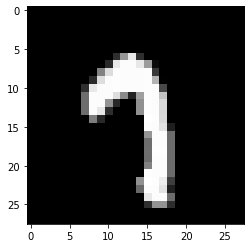

Label: 7
Predicted: 9


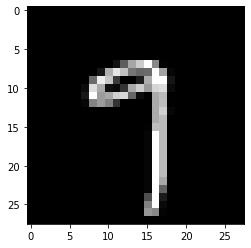

Label: 9
Predicted: 7


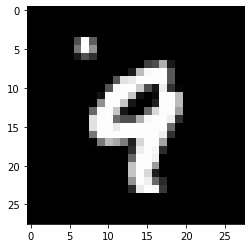

Label: 9
Predicted: 4


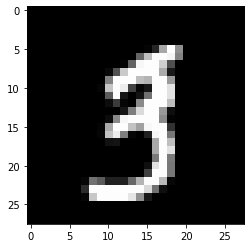

Label: 3
Predicted: 9


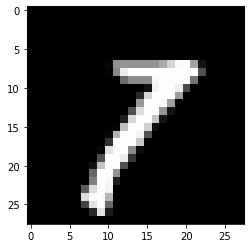

Label: 7
Predicted: 1


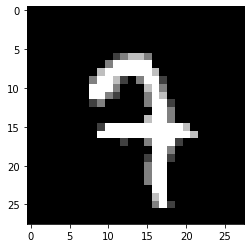

Label: 7
Predicted: 9


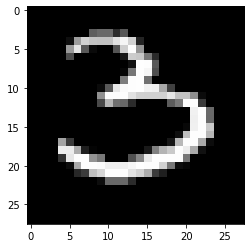

Label: 3
Predicted: 5


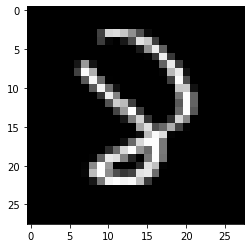

Label: 8
Predicted: 2


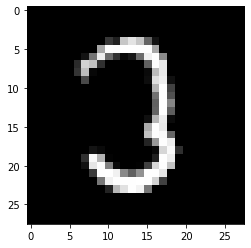

Label: 3
Predicted: 2


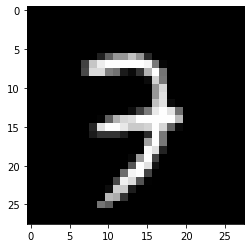

Label: 7
Predicted: 9
Number of errors:  60


In [43]:
# Inspect elements of the test data set for which predictions are not correct
cpt_errors = 0
for i in range(mnist_test.shape[0]):
    true_label = y_test[i].astype(sp.uint8)
    predicted_label = predicted_test[i].astype(sp.uint8)
    if true_label != predicted_label:
        img = mnist_test[i,1:].astype(sp.uint8).reshape(28, 28)
    plt.gray()
    plt.imshow(img)
    plt.show()
    print('Label:', y_test[i].astype(sp.uint8))
    print('Predicted:', predicted_test[i].astype(sp.uint8))
    cpt_errors += 1
print('Number of errors: ', cpt_errors)

In [44]:
# Use 5-fold cross-validation with default parameters
print(cross_val_score(clf, X_train, y_train, cv=5))

[0.935  0.925  0.9275 0.94   0.94  ]


In [45]:
# Try with different parameters
C2 = 10.0
gamma2 = 0.01 # can be replaced by a real number

# Create a new model with these parameters and do cross-validation
clf = svm.SVC(C=C2, gamma=gamma2)
print(cross_val_score(clf, X_train, y_train, cv=5))

[0.94   0.935  0.94   0.9425 0.94  ]


In [46]:
#Try with a few more values for C and gamma
C3 = 1
gamma3 = 0.01 # can be replaced by a real number

# Create a new model with these parameters and do cross-validation
clf = svm.SVC(C=C3, gamma=gamma3)
print(cross_val_score(clf, X_train, y_train, cv=5))

[0.9375 0.9325 0.9425 0.94   0.94  ]


In [47]:
C4 = 0.1
gamma4 = 0.01 # can be replaced by a real number

# Create a new model with these parameters and do cross-validation
clf = svm.SVC(C=C4, gamma=gamma4)
print(cross_val_score(clf, X_train, y_train, cv=5))

[0.8    0.7775 0.8    0.7775 0.7675]


In [48]:
C5 = 10
gamma5 = 0.1 # can be replaced by a real number

# Create a new model with these parameters and do cross-validation
clf = svm.SVC(C=C5, gamma=gamma5)
print(cross_val_score(clf, X_train, y_train, cv=5))

[0.29   0.3    0.31   0.34   0.2975]


In [49]:
C5 = 1
gamma5 = 0.1 # can be replaced by a real number

# Create a new model with these parameters and do cross-validation
clf = svm.SVC(C=C5, gamma=gamma5)
print(cross_val_score(clf, X_train, y_train, cv=5))

[0.2775 0.2825 0.2975 0.325  0.275 ]


In [50]:
C6 = 0.1
gamma6 = 0.1 # can be replaced by a real number

# Create a new model with these parameters and do cross-validation
clf = svm.SVC(C=C6, gamma=gamma6)
print(cross_val_score(clf, X_train, y_train, cv=5))

[0.1275 0.1275 0.14   0.1475 0.115 ]


In [51]:
C7 = 10
gamma7 = 1 # can be replaced by a real number

# Create a new model with these parameters and do cross-validation
clf = svm.SVC(C=C7, gamma=gamma7)
print(cross_val_score(clf, X_train, y_train, cv=5))

[0.1125 0.11   0.12   0.135  0.11  ]


In [52]:
C8 = 1
gamma8 = 1 # can be replaced by a real number

# Create a new model with these parameters and do cross-validation
clf = svm.SVC(C=C8, gamma=gamma8)
print(cross_val_score(clf, X_train, y_train, cv=5))

[0.1125 0.105  0.1125 0.1275 0.1075]


In [53]:
C9 = 0.1
gamma9 = 1 # can be replaced by a real number

# Create a new model with these parameters and do cross-validation
clf = svm.SVC(C=C9, gamma=gamma9)
print(cross_val_score(clf, X_train, y_train, cv=5))

[0.6575 0.6525 0.6525 0.645  0.5425]


In [54]:
# C2 = 10.0, gamma2 = 0.01
clf = svm.SVC(C=C2, gamma=gamma2)
X_train, y_train = normalized_mnist_train[:, 1:], normalized_mnist_train[:, 0]
clf.fit(X_train,y_train)
X_test, y_test = normalized_mnist_test[:, 1:], normalized_mnist_test[:, 0]
predicted_test = clf.predict(X_test)
for i in range(mnist_test.shape[0]):
    true_label = y_test[i].astype(sp.uint8)
    predicted_label = predicted_test[i].astype(sp.uint8)
    if true_label != predicted_label:
        cpt_errors += 1
print('error rate: ', cpt_errors/mnist_test.shape[0])

error rate:  0.114


In [55]:
# C3 = 1.0, gamma3 = 0.01
clf = svm.SVC(C=C3, gamma=gamma3)
X_train, y_train = normalized_mnist_train[:, 1:], normalized_mnist_train[:, 0]
clf.fit(X_train,y_train)
X_test, y_test = normalized_mnist_test[:, 1:], normalized_mnist_test[:, 0]
predicted_test = clf.predict(X_test)
for i in range(mnist_test.shape[0]):
    true_label = y_test[i].astype(sp.uint8)
    predicted_label = predicted_test[i].astype(sp.uint8)
    if true_label != predicted_label:
        cpt_errors += 1
print('error rate: ', cpt_errors/mnist_test.shape[0])

error rate:  0.169


In [56]:
# C4 = 0.1, gamma4 = 0.01
clf = svm.SVC(C=C4, gamma=gamma4)
X_train, y_train = normalized_mnist_train[:, 1:], normalized_mnist_train[:, 0]
clf.fit(X_train,y_train)
X_test, y_test = normalized_mnist_test[:, 1:], normalized_mnist_test[:, 0]
predicted_test = clf.predict(X_test)
for i in range(mnist_test.shape[0]):
    true_label = y_test[i].astype(sp.uint8)
    predicted_label = predicted_test[i].astype(sp.uint8)
    if true_label != predicted_label:
        cpt_errors += 1
print('error rate: ', cpt_errors/mnist_test.shape[0])

error rate:  0.349


In [57]:
# C9 = 0.1, gamma9 = 1.0
clf = svm.SVC(C=C9, gamma=gamma9)
X_train, y_train = normalized_mnist_train[:, 1:], normalized_mnist_train[:, 0]
clf.fit(X_train,y_train)
X_test, y_test = normalized_mnist_test[:, 1:], normalized_mnist_test[:, 0]
predicted_test = clf.predict(X_test)
for i in range(mnist_test.shape[0]):
    true_label = y_test[i].astype(sp.uint8)
    predicted_label = predicted_test[i].astype(sp.uint8)
    if true_label != predicted_label:
        cpt_errors += 1
print('error rate: ', cpt_errors/mnist_test.shape[0])

error rate:  0.826
